O conjunto de dados utilizados mostra todos os registros de mortes por ataque *de* ursos pretos, pardos ou polares entre 1900 e 2020 na América do Norte.

Fonte: https://data.world/makeovermonday/2019w21
https://www.kaggle.com/datasets/stealthtechnologies/bear-attacks-north-america

In [1]:
# Importando as bibliotecas necessárias para a análise
import pandas as pd #Para criação de DataFrames
import matplotlib.pyplot as plt #Para plotagem
import seaborn as sns #Design de gráficos

In [125]:
# Importando os dados
df = pd.read_csv('bear.csv')
df.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847


## Limpeza e Tratamento dos Dados

In [126]:
# Removendo colunas que não serão utilizadas na análise
df = df.drop(['Name', 'Description', 'Latitude', 'Longitude'], axis=1)
df.head()

,age,gender,Date,Month,Year,Type,Location,Type of bear,Hunter,Grizzly,Hikers,Only one killed
0,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0
1,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0
2,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0
3,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania",Black bear,0,0,0,1
4,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",Black bear,0,0,0,1


In [127]:
# Renomeando colunas
df.columns = ['Idade', 'Sexo', 'Data', 'Mês', 'Ano', 'Tipo', 'Local', 'Tipo de urso', 'Caçador', 'Urso pardo', 'Caminhantes', 'Apenas um morto']

In [93]:
df.head()

,Idade,Sexo,Data,Mês,Ano,Tipo,Local,Tipo de urso,Caçador,Urso pardo,Caminhantes,Apenas um morto
0,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0
1,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0
2,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0
3,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania",Black bear,0,0,0,1
4,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",Black bear,0,0,0,1


In [128]:
# Transformando a coluna "Local" em duas novas colunas
df[['Cidade', 'ESTADO']] = df['Local'].str.split(',', expand=True)
df['ESTADO'].value_counts()

,count
ESTADO,
Alaska,21
Montana,13
British Columbia,12
Wyoming,9
Alberta,9
Alberta,8
Alaska,7
Ontario,6
New York,5


In [130]:
df['ESTADO'].head(20)

,ESTADO
0,West Virginia
1,West Virginia
2,West Virginia
3,Pennsylvania
4,Arizona
5,Wyoming
6,Montana
7,Manitoba
8,Alberta
9,Alaska


In [12]:
df.head()

,Idade,Sexo,Data,Mês,Ano,Tipo,Local,Tipo de urso,Caçador,Urso pardo,Caminhantes,Apenas um morto,Estado
0,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,West Virginia
1,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,West Virginia
2,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,West Virginia
3,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania",Black bear,0,0,0,1,Pennsylvania
4,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",Black bear,0,0,0,1,Arizona


In [13]:
# Trocando os registros male e female por masculino e feminino
df['Sexo'] = df['Sexo'].replace({'male': 'Masculino', 'female': 'Feminino'})

In [14]:
df.head()

,Idade,Sexo,Data,Mês,Ano,Tipo,Local,Tipo de urso,Caçador,Urso pardo,Caminhantes,Apenas um morto,Estado
0,3.0,Feminino,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,West Virginia
1,5.0,Masculino,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,West Virginia
2,7.0,Masculino,19/05/1901,May,1901,Wild,"Job, West Virginia",Black bear,0,0,0,0,West Virginia
3,18.0,Masculino,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania",Black bear,0,0,0,1,Pennsylvania
4,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",Black bear,0,0,0,1,Arizona


In [15]:
# Analisando quais e quantos tipos de ursos foram registrados
df['Tipo'].value_counts()

,count
Tipo,
Wild,138
Captive,28


In [16]:
# Trocando os registros wild e captive por selvagem e capturado
df['Tipo'] = df['Tipo'].replace({'Wild': 'Selvagem', 'Captive': 'Capturado'})

In [145]:
# Trocando os registros dos meses para nome completo em português
df['Mês'] = df['Mês'].replace({'Jan': 'Janeiro', 'Feb': 'Fevereiro', 'Mar': 'Março', 'Apr': 'Abril', 'May': 'Maio', 'Jun': 'Junho', 'Jul': 'Julho', 'Aug': 'Agosto', 'Sep': 'Setembro', 'Oct': 'Outubro', 'Nov': 'Novembro', 'Dec': 'Dezembro'})

In [20]:
# Analisando quais as categorias dos tipos de ursos e quantidade em cada uma
df['Tipo de urso'].value_counts()

,count
Tipo de urso,
Brown bear,80
Black bear,76
Polar Bear,10


In [21]:
# Trocando os registros dos tipos de ursos para o nome em português
df['Tipo de urso'] = df['Tipo de urso'].replace({'Brown bear': 'Urso pardo', 'Black bear': 'Urso preto', 'Polar Bear': 'Urso polar'})

In [22]:
df.head()

,Idade,Sexo,Data,Mês,Ano,Tipo,Local,Tipo de urso,Caçador,Urso pardo,Caminhantes,Apenas um morto,Estado
0,3.0,Feminino,19/05/1901,Maio,1901,Selvagem,"Job, West Virginia",Urso preto,0,0,0,0,West Virginia
1,5.0,Masculino,19/05/1901,Maio,1901,Selvagem,"Job, West Virginia",Urso preto,0,0,0,0,West Virginia
2,7.0,Masculino,19/05/1901,Maio,1901,Selvagem,"Job, West Virginia",Urso preto,0,0,0,0,West Virginia
3,18.0,Masculino,24/11/1906,Nov,1906,Selvagem,"Elk County, Pennsylvania",Urso preto,0,0,0,1,Pennsylvania
4,1.0,NaN,05/10/1908,Oct,1908,Capturado,"Tucson, Arizona",Urso preto,0,0,0,1,Arizona


In [26]:
# Verificando dados nulos
df.isna().sum()

,0
Idade,2
Sexo,1
Data,0
Mês,0
Ano,0
Tipo,0
Local,0
Tipo de urso,0
Caçador,0
Urso pardo,0


In [30]:
# Removendo dados nulos
df = df.dropna(axis=0)

In [31]:
# Nulos removidos
df.isna().sum()

,0
Idade,0
Sexo,0
Data,0
Mês,0
Ano,0
Tipo,0
Local,0
Tipo de urso,0
Caçador,0
Urso pardo,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 165
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            163 non-null    float64
 1   Sexo             163 non-null    object 
 2   Data             163 non-null    object 
 3   Mês              163 non-null    object 
 4   Ano              163 non-null    int64  
 5   Tipo             163 non-null    object 
 6   Local            163 non-null    object 
 7   Tipo de urso     163 non-null    object 
 8   Caçador          163 non-null    int64  
 9   Urso pardo       163 non-null    int64  
 10  Caminhantes      163 non-null    int64  
 11  Apenas um morto  163 non-null    int64  
 12  Estado           163 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 17.8+ KB


In [34]:
df.describe()

,Idade,Ano,Caçador,Urso pardo,Caminhantes,Apenas um morto
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,36.332822,1982.245399,0.092025,0.165644,0.036810,0.828221
std,20.254524,28.170796,0.289951,0.372907,0.188875,0.378351
min,0.416667,1901.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1968.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,1988.000000,0.000000,0.000000,0.000000,1.000000
75%,51.500000,2005.000000,0.000000,0.000000,0.000000,1.000000
max,93.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.head()

,Idade,Sexo,Data,Mês,Ano,Tipo,Local,Tipo de urso,Caçador,Urso pardo,Caminhantes,Apenas um morto,Estado
0,3.0,Feminino,19/05/1901,Maio,1901,Selvagem,"Job, West Virginia",Urso preto,0,0,0,0,West Virginia
1,5.0,Masculino,19/05/1901,Maio,1901,Selvagem,"Job, West Virginia",Urso preto,0,0,0,0,West Virginia
2,7.0,Masculino,19/05/1901,Maio,1901,Selvagem,"Job, West Virginia",Urso preto,0,0,0,0,West Virginia
3,18.0,Masculino,24/11/1906,Nov,1906,Selvagem,"Elk County, Pennsylvania",Urso preto,0,0,0,1,Pennsylvania
5,61.0,Masculino,08/09/1916,Sep,1916,Selvagem,"Yellowstone National Park, Wyoming",Urso pardo,0,0,0,1,"Yellowstone National Park, Wyoming"


## Perguntas a serem respondidas:

Análise das vítimas:
- Qual sexo foi mais atacado?
- Qual a faixa etária mais atacada?
- Em quantas ocorrências estiveram envolvidos caçadores?
- Em quantas ocorrências tiveram apenas 1 morto?

Análise temporal:
- Qual ano teve mais ocorrência?

Análise por animal:
- Qual tipo de urso atacou mais?

Análise espacial:
- Em qual estado houveram mais ocorrências de ataques?

## Análise das Vítimas

**Qual sexo foi mais atacado?**

In [182]:
df['Sexo'] = df['Sexo'].str.strip()
df['Sexo'] = df['Sexo'].replace({'male': 'Masculino', 'female': 'Feminino'})

In [44]:
# Cores para os gráficos
import random
cores = ['#606c38', '#283618', '#dda15e', '#bc6c25']

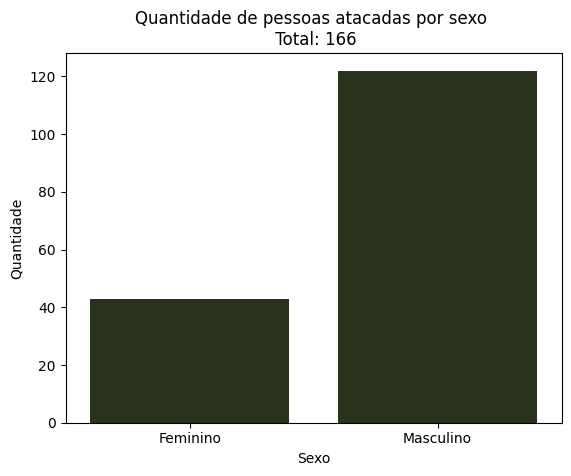

In [183]:
sns.countplot(data=df, x='Sexo', color=random.choice(cores))
plt.title(f'Quantidade de pessoas atacadas por sexo \n Total: {df.shape[0]}')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

Como podemos ver no gráfico, homens foram mais atacados por ursos do que mulheres. Isso pode ser explicado por uma série de fatores, como maior exposição a atividades de risco ao ar livre, (como caça, pesca, montanhismo e acampamento), que ocorrem em áreas selvagens, habitat natural dos ursos. Isso aumenta as chances de encontros com animais selvagens, incluindo ursos. Além disso, homens tendem a adotar uma postura mais desafiadora, o que pde ser interpretado pelos ursos como uma ameaça, aumentando a chance de ataque.




**Qual a faixa etária mais atacada?**

In [185]:
# Cria uma nova coluna no dataframe com faixas etárias
df['FaixaEtaria'] = pd.cut(df['Idade'],
                           bins=[0, 12, 18, 60, 120],  # Define os intervalos (faixas) de idade
                           labels=['Até 12 anos', '13-18 anos', '19-60 anos', 'Acima de 61 anos'])  # Define os rótulos


In [ ]:
df.head(10)

<ipython-input-188-2dc0400c3f17>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#606c38'` for the same effect.

  sns.countplot(data=df, x='FaixaEtaria', hue='FaixaEtaria', color=random.choice(cores))


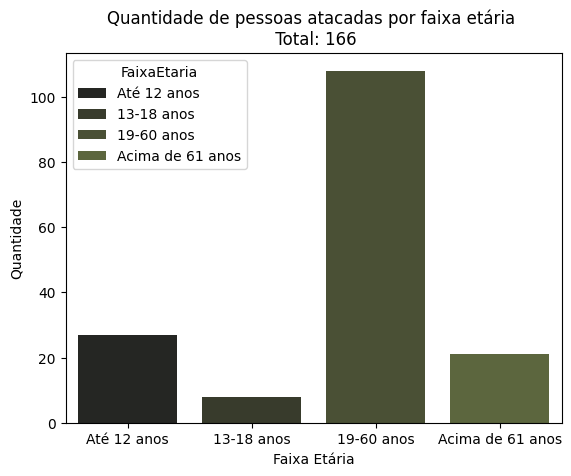

In [188]:
sns.countplot(data=df, x='FaixaEtaria', hue='FaixaEtaria', color=random.choice(cores))
plt.title(f'Quantidade de pessoas atacadas por faixa etária \n Total: {df.shape[0]}')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show()


O fato de crianças e adultos serem mais atacados por ursos do que idosos e adolescentes é semelhante ao caso dos homens, ou seja, maior envolvimento destas faixas etárias em atividades no ambiente em que os ursos vivem. Além disso, crianças podem não saber como reagir diante do animal e adultos podem apresentar algum comportamento visto como ameaça, o que aumenta a chance de ataque.

**Em quantas ocorrências estiveram envolvidos caçadores?**

In [55]:
# Troca os valores numéricos da coluna "caçador" por sim e não
df['Caçador'] = df['Caçador'].replace({0: 'Não', 1: 'Sim'})
df['Caçador'].value_counts()

,count
Caçador,
Não,148
Sim,15


<ipython-input-57-5c8c9ab69bb8>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#bc6c25'` for the same effect.

  sns.countplot(data=df, x='Caçador', hue='Caçador', color=random.choice(cores))


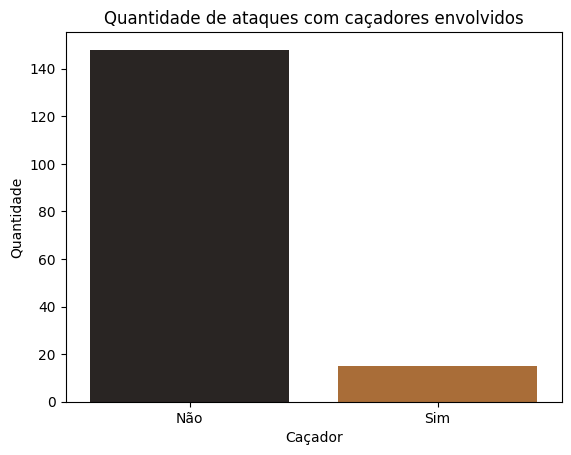

In [57]:
sns.countplot(data=df, x='Caçador', hue='Caçador', color=random.choice(cores))
plt.title('Quantidade de ataques com caçadores envolvidos')
plt.xlabel('Caçador')
plt.ylabel('Quantidade')
plt.show()

A maior parte dos ataques não teve caçador envolvido. Possivelmente pois muitos ataques ocorrem em áreas próximas a trilhas, acampamentos e locais de recreação, onde ursos e pessoas se encontram com frequência. Nessas situações, é menos provável que haja caçadores, que geralmente se deslocam para áreas mais remotas e em horários diferentes.


## Análise Temporal

**Como os ataques se distribuem ao longo dos anos?**

In [60]:
df['Ano'].value_counts()

,count
Ano,
1980,7
2005,7
2018,6
2014,5
1983,5
...,...
1988,1
1990,1
1953,1


In [63]:
# Novo dataframe com casos por ano para plotar o gráfico
por_ano = df['Ano'].value_counts().reset_index().sort_values(by='Ano', ascending=False)
por_ano.columns = ['Ano', 'count']
por_ano

,Ano,count
2,2018,6
41,2017,2
51,2016,1
39,2015,2
3,2014,5
...,...,...
32,1929,2
48,1922,1
50,1916,1
55,1906,1


Text(0.5, 0, 'Ano')

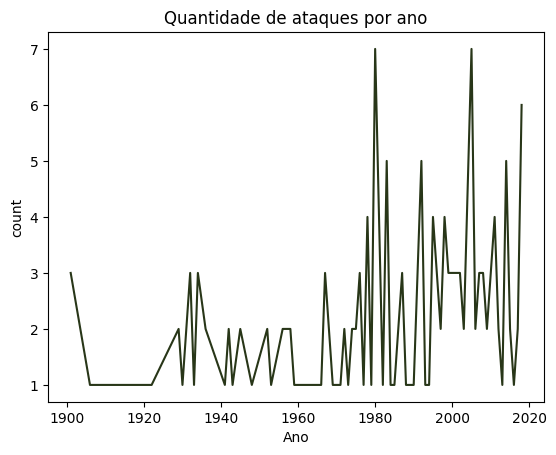

In [64]:
sns.lineplot(data=por_ano, x='Ano', y='count', color=random.choice(cores))
plt.title('Quantidade de ataques por ano')
plt.xlabel('Ano')

In [66]:
# Criada nova coluna para dividir os anos em décadas
df['Decada'] = pd.cut(df['Ano'],
                      bins=list(range(1900, 2030, 10)),  # Criar os intervalos de 10 em 10 anos
                      right=False,  # Não incluir o limite superior (anos como 1910 serão incluídos na década de 1900)
                      labels=[f'{i}s' for i in range(1900, 2020, 10)])  # Rótulos das décadas

In [68]:
# Novo dataframe para criar gráfico de quantidade de ataques vs. décadas
df['Decada'].value_counts()
decada = df['Decada'].value_counts().reset_index().sort_values(by='Decada', ascending=False)
decada

,Decada,count
2,2010s,26
0,2000s,28
1,1990s,27
3,1980s,21
4,1970s,18
6,1960s,10
7,1950s,8
8,1940s,7
5,1930s,10
10,1920s,3


Text(0, 0.5, 'Quantidade')

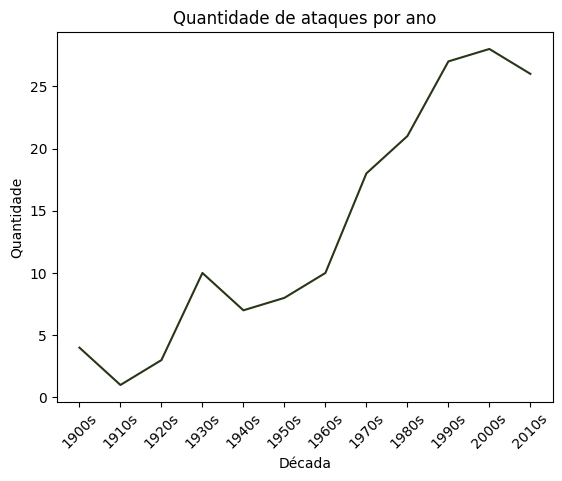

In [70]:
sns.lineplot(data=decada, x='Decada', y='count', color=random.choice(cores))
plt.title('Quantidade de ataques por ano')
plt.xticks(rotation=45)
plt.xlabel('Década')
plt.ylabel('Quantidade')

Podemos observar que houve um aumento na quantidade de ataques de ursos a partir da década de 1940. Após a Segunda Guerra Mundial, houve um boom populacional, especialmente na América do Norte. A expansão de áreas urbanas e suburbanas invadiu habitats naturais dos ursos, aumentando a frequência de encontros entre humanos e ursos.
O desenvolvimento de infraestrutura, como rodovias e parques nacionais, tornou as áreas selvagens mais acessíveis a turistas e visitantes. Com o aumento de visitantes, os ursos começaram a associar humanos e suas atividades a fontes de alimento, como lixeiras, restos de acampamento e alimentos deixados em carros e piqueniques. Esse comportamento alimentar alterado pode ter levado a um aumento nas interações e ataques.

Em algumas regiões, as populações de ursos começaram a se recuperar após medidas de conservação, como restrições à caça e preservação de habitats. Com mais ursos na natureza, a chance de encontros com humanos também aumentou. Alterações no clima e mudanças no uso do solo podem ter afetado a disponibilidade de alimentos naturais para os ursos. Isso pode tê-los forçado a se aproximar de áreas urbanas ou acampamentos humanos em busca de comida, aumentando o número de encontros com humanos.

A partir da década de 1940, a coleta de dados e a documentação de ataques de ursos podem ter se tornado mais sistemáticas, com maior cobertura da mídia e registros mais detalhados. Isso pode ter contribuído para a percepção de aumento nos ataques, mesmo que os números absolutos não tenham mudado drasticamente.


In [176]:
meses = {'Janeiro':1, 'Fevereiro':2, 'Março':3, 'Abril':4, 'Maio':5, 'Junho':6, 'Julho':7, 'Agosto':8, 'Setembro':9, 'Outubro':10, 'Novembro':11, 'Dezembro':12}

df['Mês_Numero'] = df['Mês'].map(meses)  # Converte os meses para números

# Ordena a coluna mês usando a coluna de números de meses
por_mes = df['Mês'].value_counts().reset_index().sort_values(by='Mês', key=lambda x: x.map(meses), ascending=True)

por_mes

,Mês,count
8,Janeiro,3
11,Fevereiro,1
10,Março,1
7,Abril,4
5,Maio,18
4,Junho,20
1,Julho,27
0,Agosto,28
3,Setembro,25
2,Outubro,25


Text(0, 0.5, 'Quantidade')

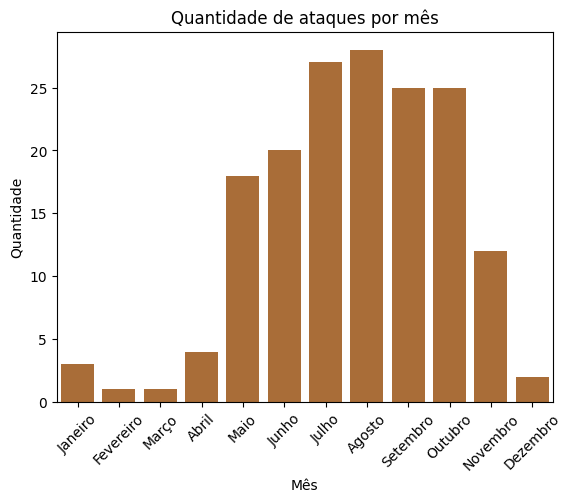

In [178]:
sns.barplot(data=por_mes, x='Mês', y='count', color=random.choice(cores))
plt.title('Quantidade de ataques por mês')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Quantidade')

Julho e agosto foram os meses em que mais houveram ataques, pois correspondem ao auge do verão na América do Norte, quando muitas pessoas tiram férias e se dedicam a atividades ao ar livre, como camping, trilhas, pesca e piqueniques.

Durante o verão, os ursos estão em um período de intensa busca por alimento para acumular gordura em preparação para a hibernação no outono e inverno. Isso os torna mais ativos e mais propensos a explorar novas áreas em busca de recursos alimentares, aumentando o risco de interações com humanos.
3

## Análise Espacial

**Em qual região tiveram mais ocorrências de ataques?**

In [141]:
# Monta um novo dataframe com contagem de ataques por região
por_estado = df['ESTADO'].value_counts().reset_index()
por_estado['ESTADO'] = por_estado['ESTADO'].str.strip()
por_estado_agrupado = por_estado.groupby('ESTADO').sum().reset_index()
por_estado_agrupado

,ESTADO,count
0,Alaska,28
1,Alberta,17
2,Arizona,4
3,British Columbia,17
4,California,2
5,Colorado,4
6,Illinois,3
7,Maine,2
8,Manitoba,4
9,Maryland,1


Text(0, 0.5, 'Quantidade')

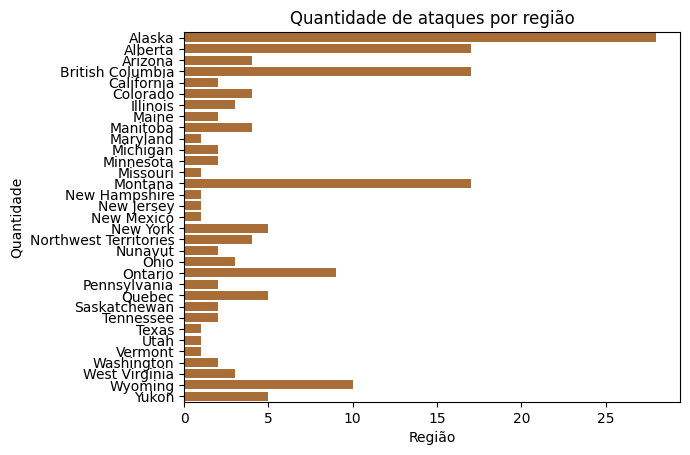

In [142]:
sns.barplot(data=por_estado_agrupado, y='ESTADO', x='count', color=random.choice(cores))
plt.title('Quantidade de ataques por região')
plt.xlabel('Região')
plt.ylabel('Quantidade')

Certas regiões, como Alaska e Montana, apresentam um número muito maior de ataques em comparação com outras áreas. Isso pode sugerir que essas regiões têm maiores populações de ursos, vastas áreas selvagens, ou que as atividades humanas estão mais propensas a entrar em contato com habitats de ursos nessas localidades.


Para uma análise mais profunda, seria interessante verificar dados populacionais dos ursos por região, a distribuição de parques nacionais e áreas selvagens e dados sobre o comportamento humano e a presença de pessoas nas áreas rurais.

## Análise por Animal

**Qual tipo de urso atacou mais?**

<ipython-input-74-0cf696ce0b4e>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#bc6c25'` for the same effect.

  sns.countplot(data=df, x='Tipo de urso', hue='Tipo', color=random.choice(cores))


Text(0, 0.5, 'Quantidade')

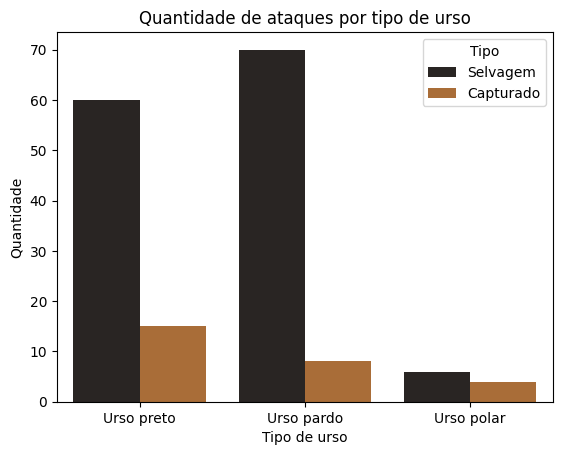

In [74]:
sns.countplot(data=df, x='Tipo de urso', hue='Tipo', color=random.choice(cores))
plt.title('Quantidade de ataques por tipo de urso')
plt.xlabel('Tipo de urso')
plt.ylabel('Quantidade')


Tanto o urso preto quanto o urso pardo têm um número significativamente maior de ataques em comparação com o urso polar. Esses são ursos mais amplamente distribuídos e com maior contato com humanos, especialmente em áreas como florestas e montanhas. Além disso, eles são geralmente mais comuns em regiões temperadas, que têm maior atividade humana. Os ataques de ursos polares são significativamente menores, tanto em ambientes selvagens quanto capturados. Isso pode estar relacionado à localização geográfica dos ursos polares, que vivem em regiões remotas com menor densidade populacional humana, além do fato de serem menos comuns em cativeiro.  A presença de ataques por ursos capturados pode levantar questões sobre a eficácia das medidas de segurança em cativeiros ou zoológicos. Mesmo em cativeiro, o número de ataques não é desprezível, e isso sugere a necessidade de reforço nas práticas de manejo.